핸즈온 9장 비지도 학습 p.299~328


### **[개념 정리+코드 필사]📝**

# **Chapter9. 비지도학습**

비지도학습 방법
- 군집(클러스터링): 고객 분류, 추천시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원축소
- 이상치 탐지: 제조, 시계열 데이터
- 밀도 추정: 확률밀도함수 추정, 이상치 탐지

### **9.1 군집**

- 군집: 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업.
- 분류와 달리 데이터셋이 어떤 그룹에 할당되어 있는지, 즉 레이블이 없음. 눈에 보이지 않는 특성 클러스터도 잘 구분함
- 고객분류, 추천시스템, 데이터 분석, 차원축소기법, 이상치 탐지, 준지도학습, 검색엔진, 이미지 분할에 사용
- 알고리즘에 따라 다른 종류의 클러스터 감지함: 어떤 알고리즘은 센트로이드(특정 포인트) 중심으로, 다른건 밀집되어 연속된 영역으로 군집을 찾음. 군집은 아주 다양함


📘9.1.1 k-평균

- k-평균: 레이블이 없는 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 알고리즘.
  - 각 클러스터 중심을 찾고 가장 가까운 클러스터에 샘플 할당
  - 클러스터 개수 k지정
  - 각 샘플은 하나의 클러스터에 할당, 각 레이블은 클러스터의 인덱스.(클래스 레이블X, 지도학습 아님)
      - 📃kmeans.labels_
      - 📃kmeans.cluster_centers_: 센트로이드
  - 새로운 샘플에 가장 가까운 센트로이드의 클러스터 할당가능. 센트로이드와의 **거리** 기반 할당
  - 클러스터의 결정경계: 보로노이 다이어그램

- 하드군집: 샘플을 하나의 클러스터에 할당 / 소프트 군집: 클러스터마다 샘플에 점수 부여(점수는 거리로도, 유사도 점수가 될수도)
  - 📃kmeans.transform(X_new): 샘플과 각 센트로이드 사이의 거리 반환 -> k차원 데이터셋으로 비선형 차원 축소를 효율적으로 할 수 있음

📍k-평균 알고리즘

- 센트로이드 O: 데이터셋의 모든 샘플에 가장 가까운 센트로이드의 클러스터 할당
- 센트로이드/레이블 X: 랜덤하게 선정 > 샘플에 레이블 할당 > 센트로이드 업데이트 > 샘플 레이블 할당 > 센트로이드 업데이트 반복(변화 없을 때까지)
  - 제한된 횟수 안에 수렴이 보장됨
  - 적절한 솔루션으로 수렴하지 못할 가능성. 센트로이드 초기화 단계에 운이 나쁘면 지역 최적점으로 수렴
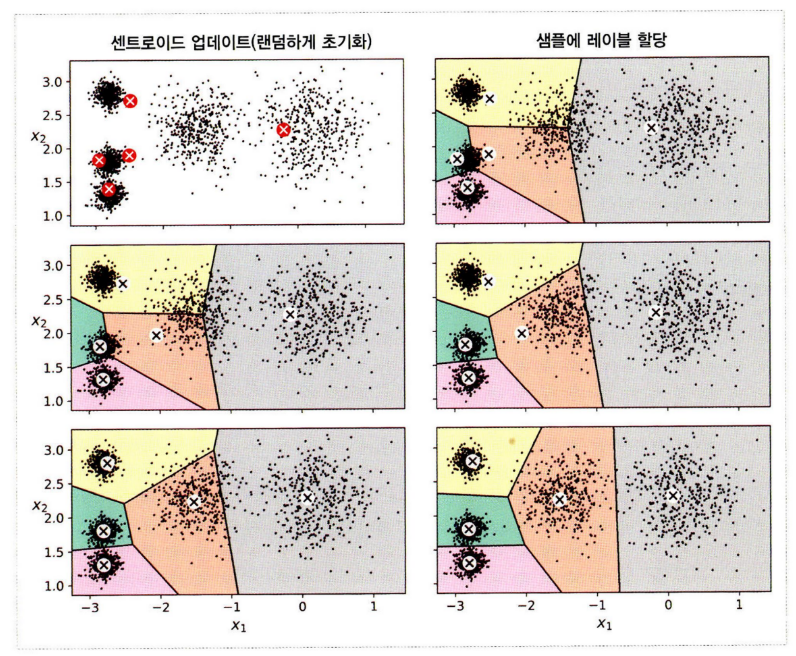


📍센트로이드 초기화 방법
- 센트로이드의 위치를 근사적으로 알 수 있다면: KMeans(n_clusters=5, init=good_init, n_init=1) good_init으로 센트로이드 리스트를 담어 지정, n_init=1로 설정
- 랜덤 초기화를 다르게 해 여러번 알고리즘 실행, 가장 좋은 솔루션 선택: n_init = n(기본값은 10), n_init="random" 지정, 사이킷런이 최적의 솔루션 반환
  - 성능 지표: 이너셔(각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리)가 가장 낮은 모델
    - 📃kmeans.inertia_: 이너셔값
    - 📃kmeans.score(X): 이너셔의 음숫값
- KMeans: k-평균++초기화 알고리즘 사용(반복 횟수 줄임)

📍k-평균 속도 개선과 미니배치 k-평균
- 삼각부등식의 사용: 불필요한 거리 계산을 피함. 샘플과 센트로이드 사이의 거리를 위한 하한선/상한선 유지 -> KMeans 기본으로 함
- 미니배치 k-평균: 각 반복마다 전체가 아닌 미니배치 사용해 조금씩 센트로이드 이동-> 속도 높임, 대량 데이터셋에 적용
  - MiniBatchKMeans(n_clusters=5)
  - 대량 데이터셋: memmap 사용 / MiniBatchKMeans.partial_fit()로 한번에 하나의 미니배치 전달
  - 속도는 일반k-평균보다 훨씬 빠르지만 이너셔는 좀 더 나쁨. 클러스터 개수(k)가 증가할수록 이너셔는 점점 더 나빠지고 훈련시간은 더 빨라짐
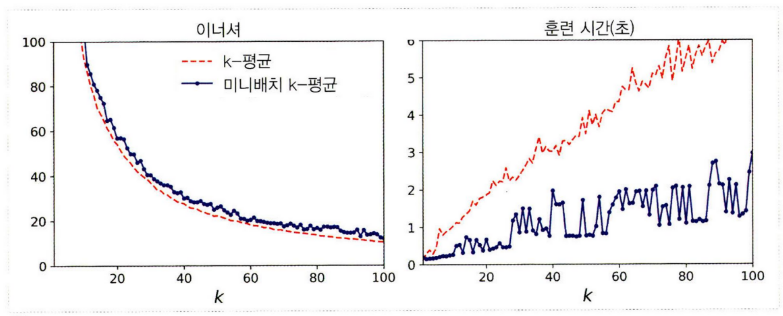


📍최적의 클러스터 개수 찾기

- k가 너무 작으면 별개의 클러스터를 합치고, 너무 크면 하나의 클러스터가 여러개로 나뉨
- 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가까워지고 이너셔는 작아짐. 가장 빠르게 감소하는(그래프가 꺾이는) 지점 = 엘보
- 실루엣 점수: 모든 샘플에 대한 실루엣 계수 평균
  - 실루엣 계수: (b-a)/max(a,b)
    - a: 클러스터 내부의 평균 거리 / b: 가장 가까운 클러스터까지 평균거리
    - -1~+1: +1에 가까울수록 자신의 클러스터에 잘 속해있고 다른 클러스터와 멀리 떨어져 있는 것.
  - silhouette_score(X, kmeans.labels_)
- 실루엣 다이어그램: 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그린 그래프. 높이는 샘플 개수, 너비는 정렬된 실루엣 계수(넓을수록 좋음), 수직선은 실루엣 점수
  - 한 클러스터의 샘플 대부분이 실루엣 점수보다 낮은 계수면 다른 클러스터랑 가깝다는 의미.
  


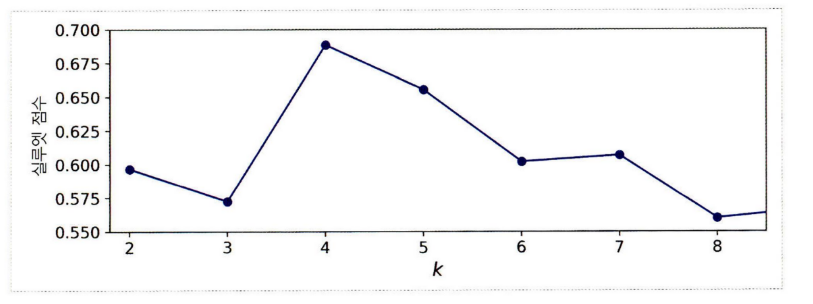

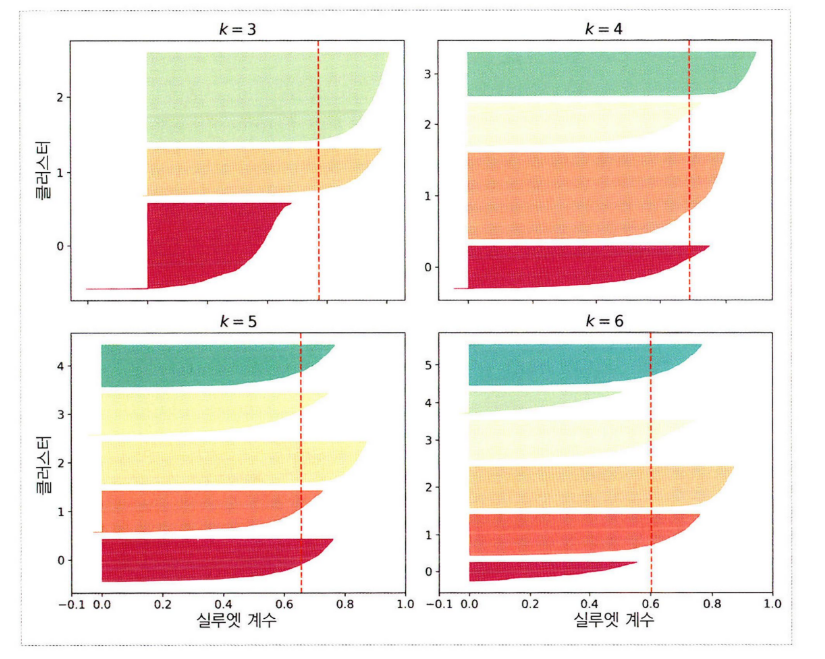

In [1]:
# 데이터 불러오기
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2, 2.3], [-1.5 , 2.3], [-2.8, 1.8],
[-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
random_state=7)

In [2]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [3]:
y_pred

array([0, 0, 4, ..., 2, 1, 0], dtype=int32)

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.06154126,  2.58026834],
       [-2.79290307,  2.79641063],
       [-1.47083264,  2.28276928],
       [ 0.32780688,  1.98072917]])

In [6]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 2, 2], dtype=int32)

In [7]:
kmeans.transform(X_new)

array([[2.83778629, 0.58352264, 2.9042344 , 1.49776738, 0.32837283],
       [5.81943941, 2.99520469, 5.84739223, 4.47976595, 2.6722626 ],
       [1.4618254 , 3.09017953, 0.29040966, 1.68901531, 3.48040395],
       [0.96879317, 3.06259333, 0.36159148, 1.54451999, 3.36807673]])

In [8]:
# 센트로이드 위치를 근사적으로 안다면 리스트로 지정 가능
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [9]:
y_pred = kmeans.fit_predict(X)
kmeans.inertia_

211.59853725816828

In [10]:
kmeans.score(X)

-211.59853725816828

In [11]:
# k-평균 속도 개선과 미니배치 k-평균
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [12]:
# 실루엣 점수로 최적의 클러스터 개수 찾기
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.655517642572828)

📘 9.1.2 k-평균의 한계

k-평균은 최적이 아닌 솔루션을 피하기 위해 알고리즘을 여러번 실행, 클러스터 개수 지정 필요. 클러스터마다 크기/밀접도가 다르거나 원형이 아니면 한계를 가짐

데이터에 따라 잘 맞는 군집 알고리즘이 다름
- 타원형 클러스터는 가우시란 혼합 모델 사용

📘 9.1.3 군집을 사용한 이미지 분할

- 이미지 분할: 이미지를 세그먼트 여러개로 분할
  - 시맨틱 분할: 동일한 종류의 물체에 속한 픽셀을 같은 세그먼트로 할당
  - 색상 분할:동일한 색상을 가진 픽셀을 같은 세그먼트로 할당
  - imread()로 이미지 읽기> 3D배열(높이, 너비, 컬러채널 개수)
    - 색상 리스트로 변환 후, k-평균으로 클러스터링 > 각 픽셀의 컬러 클러스터의 평균 컬러를 찾음
    - k평균은 비슷한 크기의 클러스터 만드는 경향 있어 독자적 클라스터 만들어지기 어려움




In [13]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
image = plt.imread("/content/drive/MyDrive/ESAA/OB 과제/ladybug.png")
image.shape

(533, 800, 3)

In [14]:
from sklearn.cluster import KMeans
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

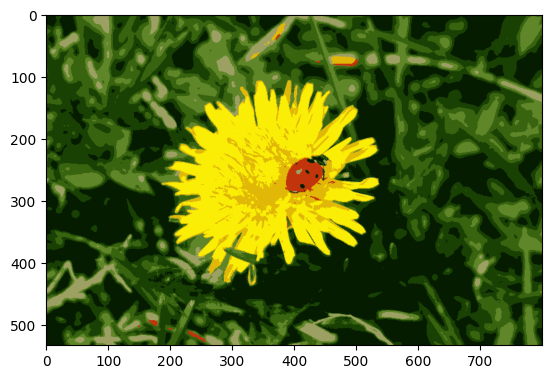

In [15]:
plt.imshow(segmented_img) # 8색상

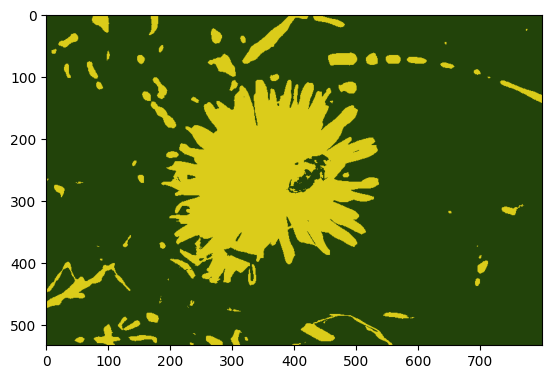

In [16]:
kmeans = KMeans(n_clusters=2).fit(X)
segmented_img_2 = kmeans.cluster_centers_[kmeans.labels_]
segmented_img_2 = segmented_img_2.reshape(image.shape)
plt.imshow(segmented_img_2) # 2색상

📘 9.1.4 군집을 사용한 전처리

- 차원축소에 효과적, 지도학습 알고리즘 적용 전 전처리 단계
- 파이프라인을 만들어 먼저 훈련세트를 N개의 클러스터로 모으고 이미지를 각 클러스터까지 거리로 바꾼 후 로지스틱 회귀 적용 -> 오차율을 줄일 수 있음
  - GridSearchCV로 최적의 클러스터 개수 k값을 찾을 수 있음
  - 분류 파이프라인의 전처리 단계이므로 실루엣 분석이나 이너셔 그래프 감소 확인 필요 없음

In [17]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
log_reg.score(X_test, y_test)

0.96

In [25]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=50, verbose=0)),
    ("log_reg",LogisticRegression()),
])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [26]:
pipeline.score(X_test, y_test)

0.96

In [28]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

In [29]:
grid_clf.best_params_

{'kmeans__n_clusters': 94}

In [30]:
grid_clf.score(X_test, y_test)

0.9688888888888889

📘 9.1.5 군집을 사용한 준지도 학습

- 준지도학습: 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을때
- 대표 이미지: 각 클러스터를 대표하는 이미지
  - 훈련세트를 N개의 클러스터로 모으고 각 클러스터에서 가장 센드로이드에 가장 가까운 이미지 찾음
  - 수동으로 샘플에 레이블 할당하면 성능 좋아짐 (대표 샘플에만 할당하는게 효율적)
- 레이블 전파: 레이블을 동일한 클러스터에 있는 모든 샘플로 전파
  - 클러스터 경계의 샘플들은 잘못 부여되어 성능 저하시킬 수 있음.
  - 센트로이드와 가까운 샘플 20%에만 레이블 전파하면 성능 매우 좋아짐



In [31]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression()

In [32]:
log_reg.score(X_test, y_test)

0.8688888888888889

In [33]:
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

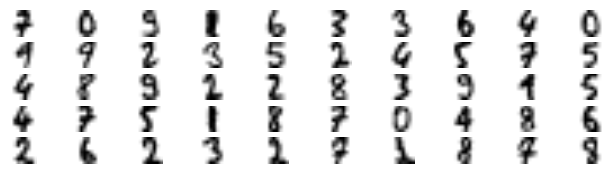

In [36]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k // 10, 10, index + 1)
  plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
  interpolation="bilinear")
  plt.axis('off')
plt.show()

In [37]:
y_representative_digits = np.array([7,0,9,1,6,3,3,6,4,0,9,9,2,3,5,2,4,5,7,5,4,8,9,2,2,8,3,9,1,5,
                                    4,7,5,1,8,7,0,4,8,6,2,6,2,3,2,7,2,8,7,8])

In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9111111111111111

In [41]:
# 레이블 전파
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9155555555555556

In [49]:
# 센트로이드와 가까운 샘플의 20%에만 레이블 전파
percentile_closet = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closet)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9288888888888889

In [51]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

np.float64(0.972318339100346)

📘 9.1.6 DBSCAN

- 국부적인 밀집도를 추정할 수 있는 군집 알고리즘
- 밀집된 연속적 지역을 클러스터로 정의
- 작동방식:
  1. 각 샘플에서 작은 거리 내에 샘플의 개수 셈(ℇ-이웃)
  2. ℇ-이웃 내에 min_samples 이상의 샘플이 있다면 핵심 샘플로 간주(밀집 지역)
  3. 핵심 심플의 이웃 모든 샘플은 동일한 클러스터. 이웃의 이웃도 계속해서 하나의 클러스터로 형성
  4. 핵심 샘플도 이웃샘플오 아니면 이상치로 판단

- 모든 클러스터가 충분히 밀접되어 있고, 밀접되어 있지 않은 지역과 잘 구분될 때 좋은 성능을 냄

- 📃DBSCAN(eps, min_samples):
  - eps 증가시켜 샘플의 이웃범위 넓히며 조정
  - predict(X), fit_predict(O): 새 샘플에 대해 예측 못함. 예측기는 사용자가 선택하여 구현함.
    - knn.fit(dbscan.components_, dbscan.lables_[dbscan.core_sample_indices_])
```
labels_(모든 샘플의 레이블-이상치는 -1), core_sample_indices_(핵심 샘플의 인덱스), components_(핵심 샘플 자체)
```
- 클러스터의 모양과 개수 상관없이 감지할 수 있음. 이상치에 안정적이고 하이퍼파라미터가 두 개뿐임.
- 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 정확히 분류하기 어려움


In [52]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000,noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [53]:
dbscan.labels_

array([-1,  0,  1, -1,  2,  1,  2,  1,  1, -1,  0,  1,  2,  2,  0,  2, -1,
        3,  1,  2,  1,  0,  1,  1,  2,  0,  2,  2,  0,  1,  1,  2,  1,  2,
        2,  2,  2,  2,  1,  2,  2,  2,  1,  2,  2,  1,  2,  1,  2,  1,  2,
        1,  0,  1,  1,  1, -1,  1,  2,  1,  1,  2,  2,  2,  2,  0,  1,  2,
        2,  3,  1,  1,  2,  2,  1, -1,  2,  3,  1,  1,  2,  1,  1,  1,  2,
       -1,  3,  1, -1,  2,  2,  1,  1,  3,  1, -1,  1,  1,  2, -1,  1,  2,
        1,  1,  2,  3,  3,  0,  1,  2,  2, -1,  3,  2,  1,  2,  1, -1,  2,
        1, -1,  1,  2,  3, -1,  2,  2,  2,  1,  1,  2,  1,  2,  2,  2,  2,
        2,  2,  2,  1,  2,  2,  2,  2,  0,  1,  1,  2, -1, -1,  2,  2,  0,
        1,  3,  2,  3,  1,  0,  2,  2,  2,  2,  2,  2,  2,  1,  1,  2,  1,
        2,  1,  2,  3, -1,  2,  0, -1,  1,  2,  2,  2,  1,  1,  2,  3,  2,
        1,  0, -1,  2,  2,  3,  2,  2,  1,  2,  1,  1,  1,  2,  3,  1,  2,
       -1,  1,  1,  1,  0,  1,  1,  1,  2, -1,  1,  0,  2,  1,  2,  3,  3,
       -1,  2,  0,  3,  0

In [54]:
len(dbscan.core_sample_indices_)

788

In [55]:
dbscan.core_sample_indices_

array([  1,   2,   4,   5,   6,   7,  10,  11,  12,  13,  14,  15,  18,
        19,  20,  21,  22,  24,  26,  29,  30,  31,  33,  34,  35,  36,
        37,  40,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,
        55,  58,  59,  60,  61,  62,  64,  65,  66,  67,  69,  71,  72,
        73,  74,  76,  77,  78,  80,  81,  82,  83,  84,  86,  89,  90,
        91,  92,  93,  94,  96,  98, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 121, 122, 123,
       125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 151, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 170, 171, 172, 173, 175, 176, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 190, 191, 192, 194, 195, 196, 197, 198,
       199, 201, 202, 205, 206, 208, 209, 211, 212, 215, 216, 217, 218,
       219, 220, 222, 223, 224, 225, 226, 227, 228, 230, 231, 23

In [56]:
dbscan.components_

array([[ 0.93809406,  0.2706394 ],
       [-0.70023799,  0.68049696],
       [ 0.2448806 , -0.09124499],
       ...,
       [-0.175198  ,  0.93954438],
       [ 0.98052139,  0.0244732 ],
       [-1.02468439,  0.19820581]])

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [58]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([1, 2, 0, 2])

In [59]:
knn.predict_proba(X_new)

array([[0.  , 0.88, 0.12, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.78, 0.  , 0.22, 0.  ],
       [0.  , 0.  , 1.  , 0.  ]])

In [60]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist >0.2] = -1
y_pred.ravel()

array([-1,  2,  0, -1])

📘 9.1.7 다른 군집 알고리즘

- **병합군집**: 클러스터 계층을 밑바닥부터 위로 쌓아 구성. 인접한 클러스터 쌍을 연결(병합)하여 트리로 그려 클러스터의 이진 트리를 얻음. 대규모 데이터셋으로 확장 가능

- **BIRCH**: 제한된 메모리로 대규모 데이터셋을 다룰 수 있음. 배치 k-평균보다 빠르고 비슷한 성능.

- **평균-이동**: 각 샘플 중심으로 하는 원을 그리고 원마다 포함된 샘플들의 평균을 구해 평균점으로 원의 중심을 이동시킴. 더 이상 이동이 없을때까지 평균이동 반복함. 지역의 최대 밀도를 찾음. DBSCAN과 비슷하나 클러스터 내부 밀집도가 불균형할 때 여러개로 나누는 차이점. 대규모 데이터셋 부적합

- **유사도 전파**: 투표 방식 사용. 샘플이 비슷한 샘플에 투표하여 수렴시켜 클러스터 형성. 대규모 데이터셋 부적합

- **스펙트럼 군집**: 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만들어 다른 군집 알고리즘 사용함. 복잡한 클러스터 구조 감지 가능
